# Simple Linear Regression 

Linear regression is a method used to use historical data that is linearly dependent to make predictions about future behaviors. There many methods to implement regression and a few of them will be examined here. One way is by using calutions from two variables such as *x* and *y*. Some formulas for doing so:

* $ \mathbf {\hat y}  =  \hat \beta_0 + \hat \beta_1 \mathbf {\hat x} + \mathbf \epsilon $ using Sum of squares **(SS)** 

* $ \mathbf {y = mx + b}$ 

* Matrix arithematic to calculate Least Square Error **(LSE)** 

## Formulas:

### Beta  hat:

$\mathbf{\hat \beta_1 = SSXY / SSX} \hspace{6cm} \mathbf{\hat \beta_0 = \overline y -  \hat \beta_1 * \overline x}$

$\mathbf{\hat \beta = (X^T X)^{-1} X^T}$

### Sum of squares for x and y:

**SSX** = $\mathbf{\sum(x - \overline x)^2 }\hspace{5cm}$ **SSY** = $ \mathbf{\sum(y - \overline y)^2}$

**SSXY** = $\mathbf{\sum((x - \overline x)*(y - \overline y))}$

### Sum of squares for error and regression:

**SSE** = $\mathbf{\sum(yi - \hat yi)^2} \hspace{5cm}$ **SSR** = $\mathbf{\sum(\hat yi - \overline y)^2}$

$R^2$ = **SSR / SST** $\hspace{5cm}$ **Residuals** = $\mathbf{y - \hat y}$


### Using SciKit Learn

This example will also use *SciKit Learn* to make predictions and *Seaborn* along with *MatPlotlib* for visualizations. 


__[More Information on Regression](https://en.wikipedia.org/wiki/Linear_regression)__

### Simple model using sum of squares calculations

This is an exmaple of a regression model using data *x* that was generated randomly from a normal distribution and put through a quadratic function to obtain a *y*. This data has been preloaded for convenience. 

In [1]:
from datascience import * # used for simple tables and scatter plots by converting df() to Table()
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
data = pd.read_csv('RR_dat1.csv')

**Functions for creating table and coordinating scatter plot**

A dataframe (base) containg two columns: x,y is taken in. The x and y columns are separated for calculations. Each column of calculations will be appended to the frame.  First the mean of both columns are calculated. This leads to the calculations found in the formulas found in the top of this notebook.  

In [3]:
# simple plot function
def regression_plot(t,x,y):
    '''
    Takes in a table t and columns for x and y
    to plot the fit line created from
    the regression model
    '''
    colors =['red','orange','brown','green','blue','purple','black']
    n = random.randint(0,6)
    clr = colors[n]
    t.scatter(x,y)
    plt.plot(t.column(x),t.column('Y^'),color= clr)

In [4]:
def create_tbl(base):
    '''
    This funtion will take a dataframe and
    use formulas to obtain slope of fit line
    for the regression model. A table will be 
    created from the base once the dataframe is done 
    being modified. The table and a dictionary containing 
    calculation values will be returned
    '''
    x = base.iloc(1)[0][:]
    y = base.iloc(1)[1][:]
    xbar = x.mean()
    ybar = y.mean()
    base['x-X'] = (x - xbar)
    base['y-Y'] = (y - ybar)
    base['(x-X)sqr'] = (base['x-X'])**2
    base['(y-Y)sqr'] = (base['y-Y'])**2
    base['(X*Y)'] = (base['x-X']*base['y-Y'])
    SST = sum(base['(y-Y)sqr']) # = SSY
    SSX = sum(base['(x-X)sqr'])
    SSXY = sum(base['(X*Y)'])
    b1_hat = SSXY/SSX
    b0_hat = ybar - b1_hat*xbar
    base['Y^'] = b0_hat + b1_hat*x
    base['(y-Y^)sqr'] = (y - base['Y^'])**2
    base['(Y^-ybar)sqr'] = (base['Y^'] - ybar)**2
    SSE = sum(base['(y-Y^)sqr'])
    SSR = sum(base['(Y^-ybar)sqr'])
    Rsqr = SSR/SST  
    info = {'Xbar':xbar,'b0^': b0_hat,'b1^': b1_hat,'SSE': SSE,'SSR': SSR,'SST': SST,'R^2': Rsqr, 'ybar':ybar}
    table = Table().from_df(base)
    return table , info

In [5]:
# create table of data and results
data_table , data_info = create_tbl(data)

In [6]:
# view data table
data_table

X,Y,x-X,y-Y,(x-X)sqr,(y-Y)sqr,(X*Y),Y^,(y-Y^)sqr,(Y^-ybar)sqr
0.200007,5.26984,-0.112411,0.679218,0.0126361,0.461337,-0.0763513,4.00952,1.58842,0.337686
0.0664092,2.33321,-0.246009,-2.25742,0.0605203,5.09594,0.555345,3.31888,0.971554,1.61733
1.28075,8.16863,0.96833,3.57801,0.937664,12.8021,3.46469,9.59642,2.03858,25.058
0.446021,4.80259,0.133603,0.211966,0.0178499,0.0449294,0.0283193,5.28129,0.229153,0.477018
-1.2597,-4.22836,-1.57211,-8.81899,2.47154,77.7745,13.8645,-3.53644,0.478759,66.0492
-0.729036,-0.226804,-1.04145,-4.81743,1.08463,23.2076,5.01713,-0.793182,0.320784,28.9854
-0.518343,2.14962,-0.830761,-2.441,0.690163,5.9585,2.02789,0.295998,3.43592,18.4438
1.88309,12.2635,1.57067,7.67291,2.46701,58.8735,12.0516,12.7102,0.199544,65.928
0.296151,5.37155,-0.0162668,0.780924,0.00026461,0.609843,-0.0127032,4.50653,0.748253,0.00707139
0.933397,9.6974,0.62098,5.10677,0.385616,26.0791,3.1712,7.80079,3.59714,10.3051


In [7]:
# checking sum of residual errors. They should = 0
round((sum(data['Y']-data['Y^'])),2)

-0.0

In [8]:
# check output of info
info_df = pd.DataFrame([data_info],index=['data'])
info_df

,R^2,SSE,SSR,SST,Xbar,b0^,b1^,ybar
data,0.94706,16.49797,295.134613,311.632583,0.312418,2.975577,5.169512,4.590625


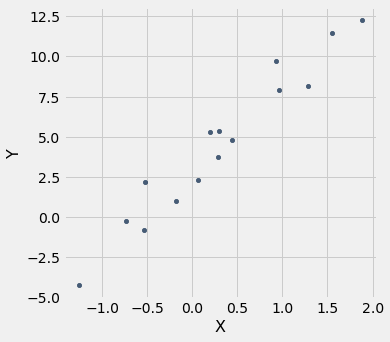

In [9]:
# plot data
data_table.scatter('X','Y')

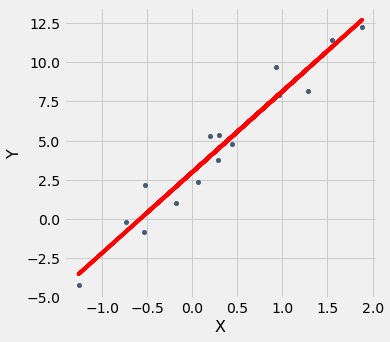

In [10]:
# plot calculated regression line
regression_plot(data_table,'X','Y')

### Time Series

__[NOAA's Climate at a Glance](https://ncdcnoaa.goc/cag)__ has time series data for New York's annual temperatures. This data will be used to demonstrate simple linear regression using __[SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)__ . The CSV file has been dowloaded for convenience.

In [11]:
# to enable Matplotlib in this notebook
%matplotlib inline
import pandas as pd

In [12]:
# read csv
nyc = pd.read_csv('ave_yearly_temp_nyc_1895-2017.csv')

In [13]:
# verify df
nyc.head()

,Date,Value,Anomaly
0,189512,52.1,-1.8
1,189612,52.3,-1.6
2,189712,52.3,-1.6
3,189812,53.8,-0.1
4,189912,52.7,-1.2


'Value" should be changed to 'Temperature' to make things easier to understand

In [14]:
# rename columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [15]:
# reformat the Date values
nyc.Date = nyc.Date.floordiv(100)

In [16]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,52.1,-1.8
1,1896,52.3,-1.6
2,1897,52.3,-1.6


### Training and Testing

As always the data needs to be split so that some will be used to train the model and the others used for testing the model's performance. By default, the estimators will use all the numeric features in a dataset so one feature (*Date*) will be used as an independent variable. Selecting one column from a dataset will produce a *one-dimensional series* but training and testing requires *two-dimensional* objects. The data must be reshaped to achieve this by using `reshape` provided by *NumPy*. The expression `nyc.Date` returns the Date column's *series*. The *-1* in the `reshape` argment causes *NumPy* to infere the number of rows. By default 75% of the data will be used for training and 25% will be used for testing. 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values)

In [19]:
X_train.shape

(92, 1)

In [20]:
X_test.shape

(31, 1)

### Training

The module `LinearRegression` will provide a simple way to implement a regression algorithm on the data. After training the estimator is called, an object containing the slope and y intercept, as in **y = mx + b** can be accessed by using `coef_` for *m* (* regression slope*) and `intercept_` for *b*. 

In [21]:
# import module
from sklearn.linear_model import LinearRegression

In [22]:
# create instance
linear_regression = LinearRegression()

In [23]:
# build model
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# display coeff
linear_regression.coef_

array([0.03497586])

In [25]:
# display intercept
linear_regression.intercept_

-14.672637403916603

### Testing

The model will be tested for accuracy and the results of every fifth element will be displayed. 

In [26]:
# make predicions
predicted = linear_regression.predict(X_test)

In [27]:
# change name for legibility
expected = y_test

In [28]:
# display every fifth prediction
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 53.25, expected: 53.50
predicted: 55.38, expected: 53.80
predicted: 52.45, expected: 53.20
predicted: 54.68, expected: 54.80
predicted: 52.87, expected: 55.00
predicted: 53.29, expected: 53.20
predicted: 52.41, expected: 52.60


### Predicting

The coefficient and intercept can be used to make predictions. `Lambda` will perform the *mx + b* function on each line. 

In [29]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [30]:
predict(2020)

array([55.97859782])

In [31]:
predict(1900)

array([51.78149473])

### Visualizing Regression Line

A scatter plot from `Seaborn` will provide more sophisticated plots for visualizing the data and the regression line. To display th regression line:
* an array containg the minimum and maximum date values in `nyc.Date` is created as the *x coordinates* of the regression line's start and end points
* the values obtained from `predict lambda` will be used as the *y coordinates*. 

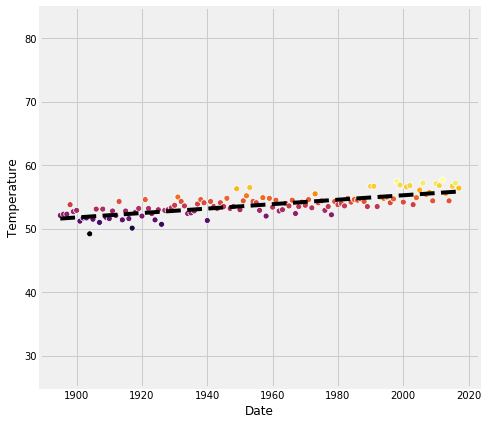

In [33]:
import seaborn as sns

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='inferno', legend=False)

axes.set_ylim(25, 85) # centers the output

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y,'k--')